# 👖 Autoencoders on Fashion MNIST

In this notebook, we'll walk through the steps required to train your own autoencoder on the fashion MNIST dataset.

TO DO
1. Convert the .HEIC to .PNG format.
2. Down resolution of the images. 
3. Randomize the train and test dataset. 
4. Use only the pumpkins images to see if the performance improves
5. Increase the resolution of the images to the performance 
6. Play with hyperparmeters to see the effect
7. Change the normalization to z-score normalization
8. Augment the images

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import tensorflow

from tensorflow.keras import layers, models, datasets, callbacks
import tensorflow.keras.backend as K
from tensorflow.image import resize as tfresize
from tensorflow.keras.preprocessing.image  import ImageDataGenerator 

import pillow_heif
import os
from PIL import Image
import cv2

In [2]:
def display(images, n=10, m=1):
  fig=plt.figure()
  fig.set_figheight(40)
  fig.set_figwidth(40)
  for i in range(n):
      plt.subplot(m, n, i+1)
      plt.xticks([])
      plt.yticks([])
      plt.imshow(images[i], cmap=plt.cm.binary)
  plt.tight_layout()
  #plt.subplots_adjust(wspace=0.1, hspace=0)
  plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
  plt.show()
  plt.close()

## 0. Parameters <a name="parameters"></a>

In [3]:
IMAGE_SIZE = 512  # Width and height of images
CHANNELS = 3
BATCH_SIZE = 16
BUFFER_SIZE = 1000
VALIDATION_SPLIT = 0.2
EMBEDDING_DIM = 2
EPOCHS = 30

## 1. Prepare the data <a name="prepare"></a>

In [196]:
# # CONVERT HEIF TO PNG IMAGES
# import pillow_heif
# filepath = r"C:\Users\kamata3\Work\ML_Projects\VAE\CC_dataset\data_HEIC"
# newpath = r"C:\Users\kamata3\Work\ML_Projects\VAE\CC_dataset\data_PNG2"
# images = []
# for filename in os.listdir(filepath):
#     #print(filename, end="   ")
#     if (filename.endswith("heic") or filename.endswith("HEIC")) and pillow_heif.is_supported(os.path.join(filepath,filename)):
#         heif_file = pillow_heif.open_heif(os.path.join(filepath,filename))
#         img = np.asarray(heif_file)
#         filename = filename.replace(".HEIC", ".png")
#         filename = filename.replace(".heic", ".png")
#         # img = img[::img.shape[0]//1024+1, ::img.shape[1]//1024+1]
#         newimg = tfresize(img, [1024, 1024])
#         #print(newimg.shape)
#         plt.imsave(os.path.join(newpath,filename), img)

In [41]:
# import image to see if shape
# filepath = r'C:\Users\kamata3\Work\ML_Projects\VAE\CC_dataset\PNG'
# filenames = os.listdir(filepath)
# filename = plt.imread(os.path.join(filepath, filenames[0]))

# print(filename.shape)
# print(filename[0:5,0:5,3])


In [39]:
# # OFFLINE AUGMENTATION OF THE IMAGES 
# import cv2
# input_dir = r'C:\Users\kamata3\Work\ML_Projects\VAE\CC_dataset\data_PNG'
# output_dir = "augmented_images/"
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)
# image_files = os.listdir(input_dir)
# # Define augmentation parameters
# rotation_angles = [-2.5, 2.5]  # Rotation angles in degrees
# flip_horizontal = True       # Horizontal flipping (True/False)
# brightness_factors = [0.7, 1.3]  # Brightness adjustment factors
# scale_factors = [0.8, 1.2]  # Scaling factors
# noise_stddev = 10  # Standard deviation of Gaussian noise
# crop_size = (200, 200)  # Crop size (height, width)

# i = 0 # name of augmented images
# for image_file in image_files:
#     if image_file.endswith((".jpg", ".jpeg", ".png")):
#         # Read the image using OpenCV
#         image_path = os.path.join(input_dir, image_file)
#         image = cv2.imread(image_path)
#         # Apply random rotation
#         angle = np.random.uniform(rotation_angles[0], rotation_angles[1])
#         rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle, 1)
#         rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
        
#         img_name = str(i)+'.png'
#         output_path = os.path.join(output_dir, img_name)
#         cv2.imwrite(output_path, rotated_image)
#         i += 1

# for image_file in image_files:
#     if image_file.endswith((".jpg", ".jpeg", ".png")):
#         image_path = os.path.join(input_dir, image_file)
#         image = cv2.imread(image_path)
#         if flip_horizontal and np.random.choice([True, False]):
#             rotated_image = cv2.flip(image, 1)
#         img_name = str(i)+'.png'
#         output_path = os.path.join(output_dir, img_name)
#         cv2.imwrite(output_path, rotated_image)
#         i += 1

# for image_file in image_files:
#     if image_file.endswith((".jpg", ".jpeg", ".png")):
#         image_path = os.path.join(input_dir, image_file)
#         image = cv2.imread(image_path)

#         brightness_factor = np.random.uniform(brightness_factors[0], brightness_factors[1])
#         augmented_image = cv2.convertScaleAbs(image, alpha=brightness_factor, beta=0)

#         img_name = str(i)+'.png'
#         output_path = os.path.join(output_dir, img_name)
#         cv2.imwrite(output_path, augmented_image)
#         i += 1

# for image_file in image_files:
#     if image_file.endswith((".jpg", ".jpeg", ".png")):
#         image_path = os.path.join(input_dir, image_file)
#         image = cv2.imread(image_path)
        
#         scale_factor = np.random.uniform(scale_factors[0], scale_factors[1])
#         scaled_height = int(image.shape[0] * scale_factor)
#         scaled_width = int(image.shape[1] * scale_factor)
#         augmented_image = cv2.resize(image, (scaled_width, scaled_height))

#         img_name = str(i)+'.png'
#         output_path = os.path.join(output_dir, img_name)
#         cv2.imwrite(output_path, augmented_image)
#         i += 1

# for image_file in image_files:
#     if image_file.endswith((".jpg", ".jpeg", ".png")):
#         image_path = os.path.join(input_dir, image_file)
#         image = cv2.imread(image_path)

#         noise = np.random.normal(0, noise_stddev, image.shape).astype(np.uint8)
#         augmented_image = cv2.add(image, noise)

#         img_name = str(i)+'.png'
#         output_path = os.path.join(output_dir, img_name)
#         cv2.imwrite(output_path, augmented_image)
#         i += 1

# # for image_file in image_files:
# #     if image_file.endswith((".jpg", ".jpeg", ".png")):

# #         h, w = augmented_image.shape[:2]
# #         if h > crop_size[0] and w > crop_size[1]:
# #             top = np.random.randint(0, h - crop_size[0])
# #             left = np.random.randint(0, w - crop_size[1])
# #             augmented_image = augmented_image[top:top + crop_size[0], left:left + crop_size[1]]

# #         img_name = str(i)+'.png'
# #         output_path = os.path.join(output_dir, img_name)
# #         cv2.imwrite(output_path, augmented_image)
# #         i += 1

In [200]:
# # DOWN RESOLUTION OF THE IMAGES TO (1024x1024)
# ##filepath = r'C:\Users\kamata3\Work\ML_Projects\VAE\CC_dataset\data_PNG'
# image_dir = r'C:\Users\kamata3\Work\ML_Projects\VAE\CC_dataset\data_PNG2'
# #newpath  = r'C:\Users\kamata3\Work\ML_Projects\VAE\down_res_images'
# newpath  = r'C:\Users\kamata3\Work\ML_Projects\VAE\Images_res_512'
# images = []
# i = 0
# for image_file in os.listdir(image_dir):
#     if image_file.endswith((".jpg", ".jpeg", ".png")):
#         image = cv2.imread(os.path.join(image_dir, image_file))
#         image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_AREA)
#         image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         filename = str(i)+'.png'
#         plt.imsave(os.path.join(newpath,filename), image2)
#         images.append(np.asarray(image2)[:,:,:3])
#         i +=1


In [4]:
# LOAD THE LOW RESOLUTION IMAGES FROM THE DIRECTORY 
## img_dir  = r'C:\Users\kamata3\Work\ML_Projects\VAE\Images_res_1024'
img_dir = r'C:\Users\kamata3\Work\ML_Projects\VAE\Images_res_512'
images = []
for image_file in os.listdir(img_dir):
    if image_file.endswith((".jpg", ".jpeg", ".png")):
        image = cv2.imread(os.path.join(img_dir, image_file))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
np_images = np.array(images, dtype='float32')

In [5]:
# CUSTOM image resizing code

# filepath = r'C:\Users\kamata3\Work\ML_Projects\VAE\CC_dataset\data_PNG'
# images = []
# newpath  = r'C:\Users\kamata3\Work\ML_Projects\VAE\down_res_images'
# # Down the resolution of images
# i = 0
# for filename in os.listdir(filepath):
#     #print(filename)
#     img = plt.imread(os.path.join(filepath,filename))
#     #print(img.shape)
#     img = img[::img.shape[0]//IMAGE_SIZE+1, ::img.shape[1]//IMAGE_SIZE+1,0:3]
#     #img = img[::img.shape[0]//IMAGE_SIZE+1, ::img.shape[1]//IMAGE_SIZE+1,0:3]
#     #print(img.shape)
#     filename = str(i)+'.png'
#     plt.imsave(os.path.join(newpath,filename), img)
#     images.append(np.asarray(img))
#     i +=1

# #Image.SAVE(images)


In [9]:
# LOAD THE IMAGES AND LABLES        
img_dir = r'C:\Users\kamata3\Work\ML_Projects\VAE\Images_res_512\Ducks'
images = []
y = []
for image_file in os.listdir(img_dir):
    if image_file.endswith((".jpg", ".jpeg", ".png")):
        image = cv2.imread(os.path.join(img_dir, image_file))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
        y.append(1)
img_dir = r'C:\Users\kamata3\Work\ML_Projects\VAE\Images_res_512\Pumpkins'
for image_file in os.listdir(img_dir):
    if image_file.endswith((".jpg", ".jpeg", ".png")):
        image = cv2.imread(os.path.join(img_dir, image_file))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
        y.append(2)
img_dir = r'C:\Users\kamata3\Work\ML_Projects\VAE\Images_res_512\Budhai'
for image_file in os.listdir(img_dir):
    if image_file.endswith((".jpg", ".jpeg", ".png")):
        image = cv2.imread(os.path.join(img_dir, image_file))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
        y.append(3)
np_images = np.array(images, dtype='float32')
label_images = np.array(y)

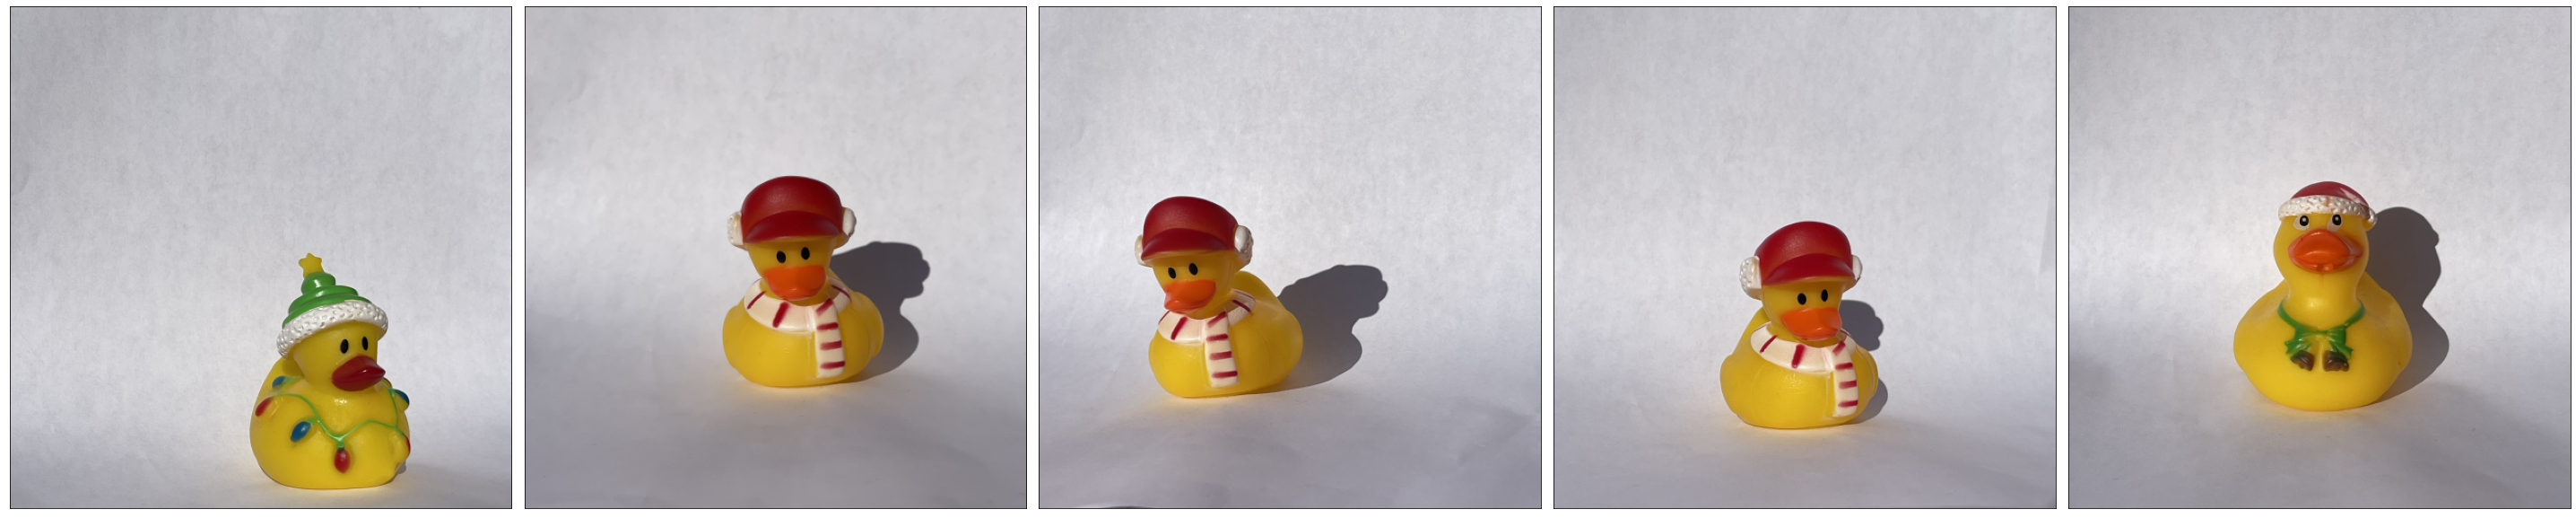

images[0].shape:  (512, 512, 3)
len(np_images):  484
np_images.shape:  (484, 512, 512, 3)


In [10]:
display(images, 5)
#np_images = np.array(images)
#np_images = np.array(images, dtype=np.float32)
print('images[0].shape: ', images[0].shape)
print('len(np_images): ',len(np_images))
print('np_images.shape: ',np_images.shape)

In [11]:
# Normalize the dataset 
# def normalize(images):
max_1 = np_images[:,:,:,0].max()
max_2 = np_images[:,:,:,1].max()
max_3 = np_images[:,:,:,2].max()
min_1 = np_images[:,:,:,0].min()
min_2 = np_images[:,:,:,1].min()
min_3 = np_images[:,:,:,2].min()

np_images[:,:,:,0] = (np_images[:,:,:,0]-min_1) /(max_1-min_1)
np_images[:,:,:,1] = (np_images[:,:,:,1]-min_2) /(max_2-min_2)
np_images[:,:,:,2] = (np_images[:,:,:,2]-min_3) /(max_3-min_3)
print(np_images[:,:,:,0].max())
print(np_images[:,:,:,1].max())
print(np_images[:,:,:,2].max())

images = []

1.0
1.0
1.0


In [12]:
# Randomize and split train/test images and labels
import random
combined_arrays = list(zip(np_images, label_images))
random.shuffle(combined_arrays)
np_images, label_images = zip(*combined_arrays)
np_images =np.array(np_images)
label_images =np.array(label_images)

num_images = np_images.shape[0]
#shuffled_indices = np.random.permutation(num_images)
# np_images = np_images[shuffled_indices]
#lable_images = label_images[shuffled_indices]
x_train,y_train = np_images[0:int(np_images.shape[0]*0.8)], label_images[0:int(np_images.shape[0]*0.8)]
x_test,y_test = np_images[int(np_images.shape[0]*0.8):np_images.shape[0]],  label_images[int(np_images.shape[0]*0.8):np_images.shape[0]]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
#display(x_train[30,:,:,:], 10,3)
np_images = []

(387, 512, 512, 3)
(97, 512, 512, 3)
(387,)
(97,)


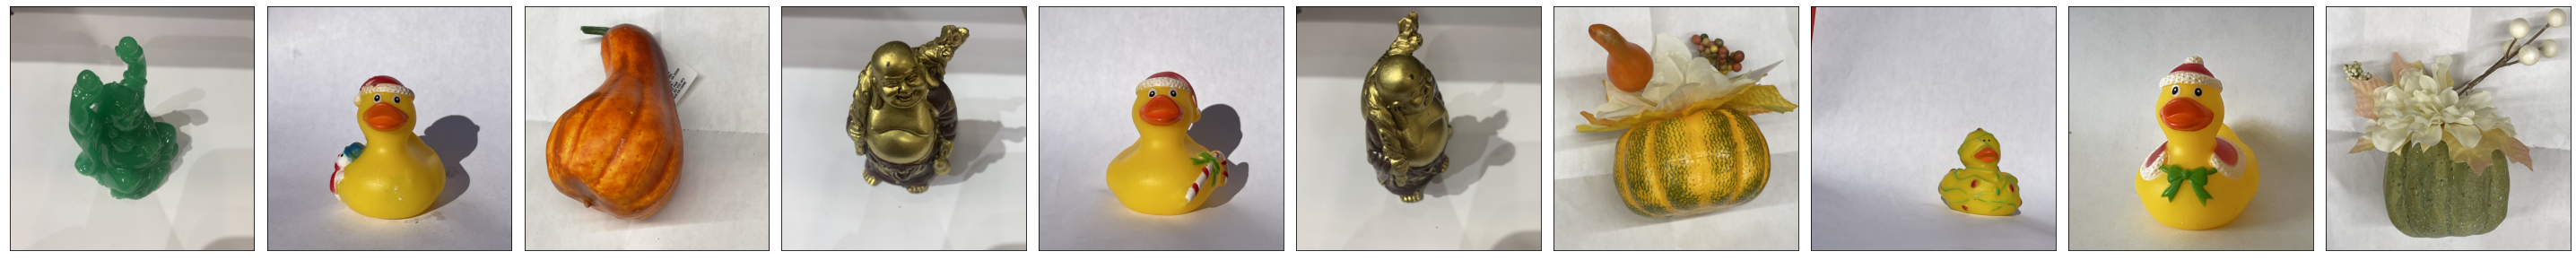

[3 1 2 3 1 3 2 1 1 2]


In [13]:
display(x_train,10)
print(y_train[0:10])

In [84]:
# # Preprocess the data 
# # something is wrong in preprocessing it makes all the pixels extremely small
# def preprocess(imgs):
#     """
#     Normalize and reshape the images
#     """
#     imgs = imgs.astype("float32") / 255.0
#     # imgs = np.pad(imgs, ((0, 0), (2, 2), (2, 2), (0,0)), constant_values=0.0)
#     # imgs = np.expand_dims(imgs, -1)
#     return imgs

# x_train = preprocess(x_train)
# x_test = preprocess(x_test)

## 2. Build the autoencoder <a name="build"></a>

In [15]:
# Encoder
encoder_input = layers.Input(
    shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS), name="encoder_input"
)
x = layers.Conv2D(32, (3, 3), strides=2, activation="relu", padding="same")(
    encoder_input
)
x = layers.Conv2D(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(128, (3, 3), strides=2, activation="relu", padding="same")(x)
shape_before_flattening = K.int_shape(x)[1:]  # the decoder will need this!

x = layers.Flatten()(x)
encoder_output = layers.Dense(EMBEDDING_DIM, name="encoder_output")(x)

encoder = models.Model(encoder_input, encoder_output)
#encoder.summary()

In [16]:
# Decoder
decoder_input = layers.Input(shape=(EMBEDDING_DIM,), name="decoder_input")
x = layers.Dense(np.prod(shape_before_flattening))(decoder_input)
x = layers.Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(
    128, (3, 3), strides=2, activation="relu", padding="same"
)(x)
x = layers.Conv2DTranspose(
    64, (3, 3), strides=2, activation="relu", padding="same"
)(x)
x = layers.Conv2DTranspose(
    32, (3, 3), strides=2, activation="relu", padding="same"
)(x)
decoder_output = layers.Conv2D(
    CHANNELS,
    (3, 3),
    strides=1,
    activation="sigmoid",
    padding="same",
    name="decoder_output",
)(x)

decoder = models.Model(decoder_input, decoder_output)
#decoder.summary()

In [17]:
# Autoencoder
# autoencoder = tensorflow.keras.Sequential([encoder,decoder])
autoencoder = models.Model(
    encoder_input, decoder(encoder_output)
)  # decoder(encoder_output)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 512, 512, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 524288)            0         
                                                                 
 encoder_output (Dense)      (None, 2)                 1048578   
                                                                 
 model_1 (Functional)        (None, 512, 512, 3)       1813

## 3. Train the autoencoder <a name="train"></a>

In [18]:
# OPTIMIZER 
Opt = tensorflow.keras.optimizers.Adam(
    learning_rate=0.0004,
    name="Adam",
)
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=4)

In [19]:
# Compile the autoencoder

autoencoder.compile(optimizer=Opt, loss="binary_crossentropy", metrics=['accuracy']) #"binary_crossentropy" loss=tensorflow.keras.losses.MeanSquaredError()
# Create a model save checkpoint
model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath="./checkpoint",
    save_weights_only=False,
    save_freq="epoch",
    monitor="loss",
    mode="min",
    save_best_only=True,
    callbacks = [callback],
    verbose=0,
)
tensorboard_callback = callbacks.TensorBoard(log_dir="./logs")

In [20]:
# Randoem Data Augmentation on the fly
train_datagen = ImageDataGenerator(rotation_range=5,  # rotation
                                   width_shift_range=0.2,  # horizontal shift
                                   height_shift_range=0.1,
                                   shear_range=0.15,
                                   zoom_range=0.2,  # zoom
                                   horizontal_flip=True,  # horizontal flip
                                   brightness_range=[0.2,0.8],
                                   rescale=1./255)  # brightness

In [149]:
# history = autoencoder.fit(
#     x_train,x_train,
#     batch_size=BATCH_SIZE, 
#     shuffle=False,
#     epochs=EPOCHS,
#     validation_data=(x_test, x_test),
#     callbacks=[model_checkpoint_callback, tensorboard_callback])

In [21]:
history = autoencoder.fit(train_datagen.flow(
    x_train,x_train,
    batch_size=BATCH_SIZE, 
    shuffle=True),
    epochs=EPOCHS,
    validation_data=(x_test, x_test),
    callbacks=[model_checkpoint_callback, tensorboard_callback]
)

Epoch 1/30
25/25 [==============================] - 39s 1s/step - loss: 0.6779 - accuracy: 0.4200 - val_loss: 0.6292 - val_accuracy: 0.6433
Epoch 2/30
25/25 [==============================] - 35s 1s/step - loss: 0.6323 - accuracy: 0.6734 - val_loss: 0.6565 - val_accuracy: 0.5953
Epoch 3/30
25/25 [==============================] - 36s 1s/step - loss: 0.6201 - accuracy: 0.6555 - val_loss: 0.6462 - val_accuracy: 0.7131
Epoch 4/30
25/25 [==============================] - 33s 1s/step - loss: 0.6158 - accuracy: 0.6950 - val_loss: 0.6386 - val_accuracy: 0.7013
Epoch 5/30
25/25 [==============================] - 35s 1s/step - loss: 0.6128 - accuracy: 0.7023 - val_loss: 0.6251 - val_accuracy: 0.6974
Epoch 6/30
25/25 [==============================] - 34s 1s/step - loss: 0.6053 - accuracy: 0.7053 - val_loss: 0.6120 - val_accuracy: 0.7181
Epoch 7/30
25/25 [==============================] - 34s 1s/step - loss: 0.6046 - accuracy: 0.7210 - val_loss: 0.6210 - val_accuracy: 0.6997
Epoch 8/30
25/25 [==

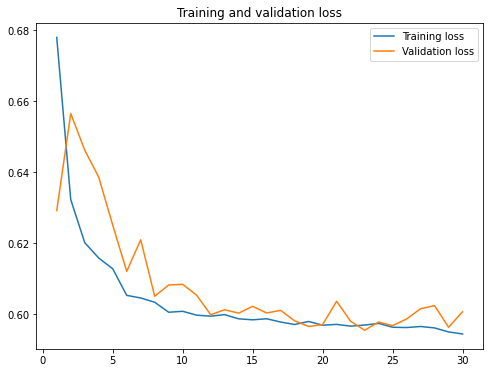

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
# Save the final models
autoencoder.save("./models/autoencoder")
encoder.save("./models/encoder")
decoder.save("./models/decoder")

INFO:tensorflow:Assets written to: ./models/autoencoder\assets
INFO:tensorflow:Assets written to: ./models/encoder\assets
INFO:tensorflow:Assets written to: ./models/decoder\assets


## 4. Reconstruct using the autoencoder <a name="reconstruct"></a>

In [24]:
n_to_predict = 5000
example_images = x_test[:n_to_predict]
#example_labels = y_test[:n_to_predict]

In [173]:
# def pltsubplots(IMG, num_rows, num_cols):
#     fig = plt.figure(figsize=(20, 4))

#     # Iterate through the images and create subplots
#     for i in range(num_rows * num_cols):
#         if i < len(images):
#             # Create a subplot in the specified position
#             plt.subplot(num_rows, num_cols, i + 1)

#             # Display the image (assuming RGB format)
#             plt.imshow(images[i])
#             plt.axis('off')  # Turn off axis labels

#     # Adjust the layout to avoid overlapping
#     plt.tight_layout()

#     # Show the entire figure
#     plt.show()

Example real decorative items


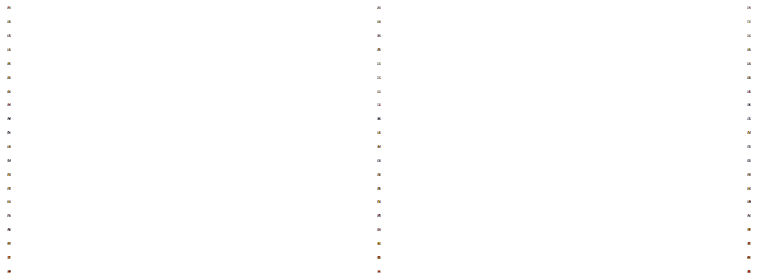

Reconstructions


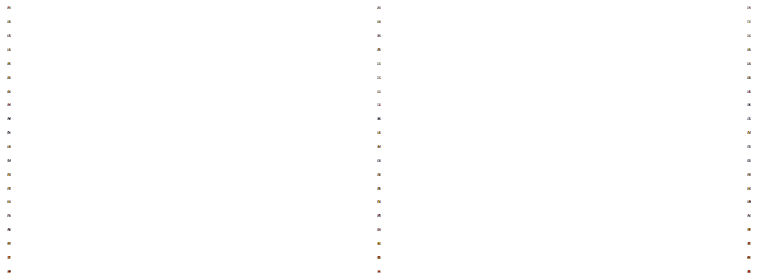

In [174]:
# print("Example real decorative items")
# pltsubplots(example_images[10:30,:,:,:],20,3)
# print("Reconstructions")
# pltsubplots(predictions[10:30,:,:,:],20,3)

Example real decorative items


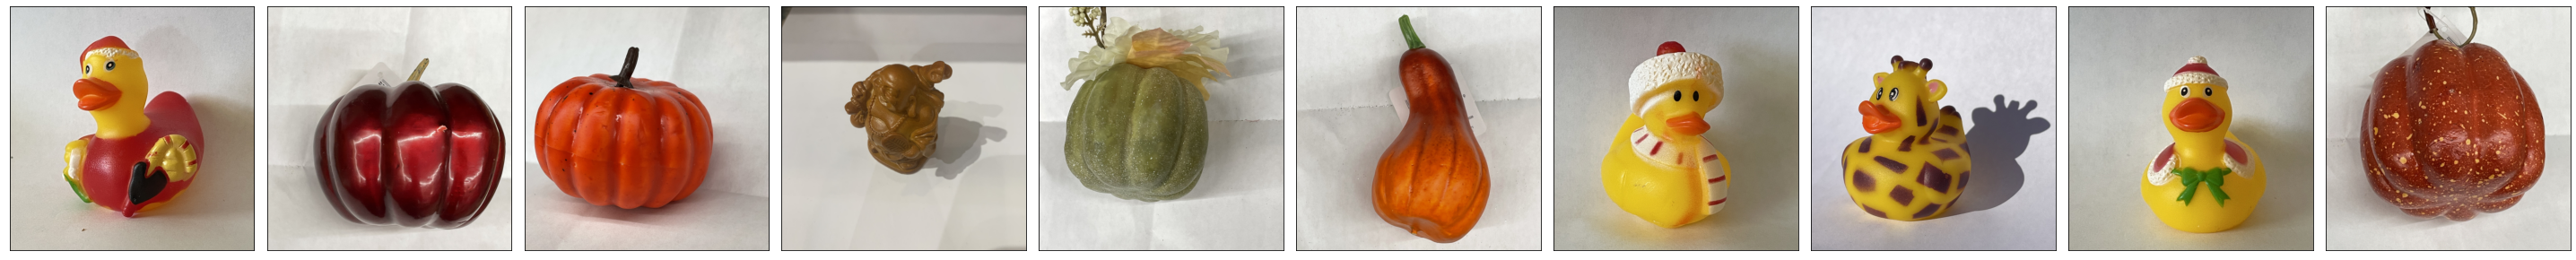

Reconstructions


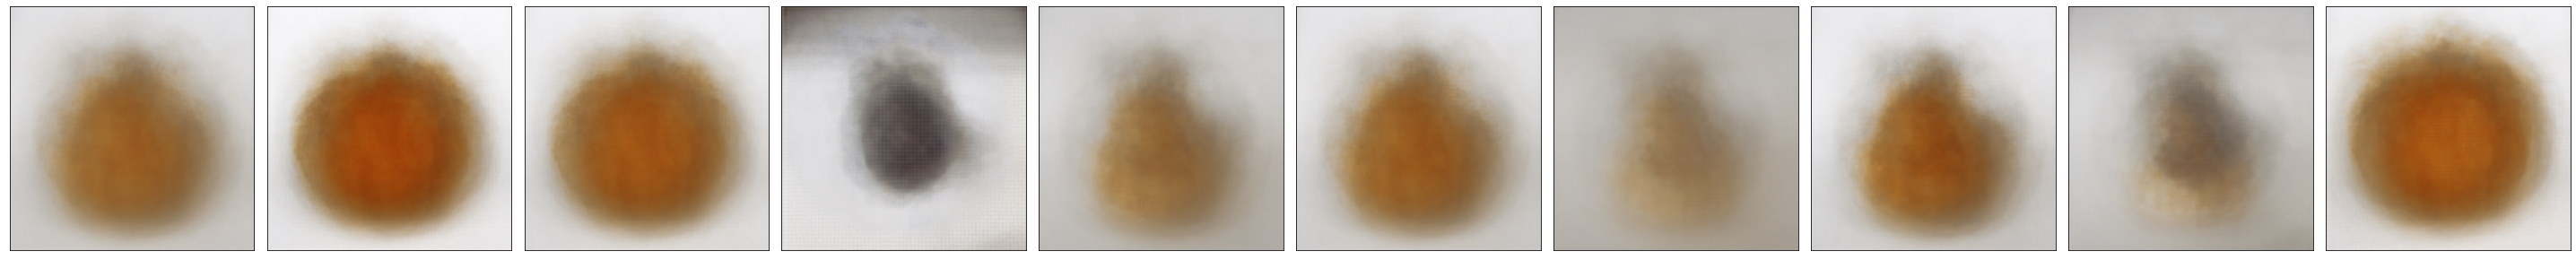

In [25]:
predictions = autoencoder.predict(example_images)
print("Example real decorative items")
display(example_images[10:30,:,:,:],10,2)
print("Reconstructions")
display(predictions[10:30,:,:,:],10,2)


## 5. Embed using the encoder <a name="encode"></a>

In [26]:
# Encode the example images
embeddings = encoder.predict(example_images)

In [27]:
# Some examples of the embeddings
print(embeddings[:10])

[[-30.516787  -35.197376 ]
 [-17.345583  -37.632107 ]
 [-42.543922  -33.3494   ]
 [ -8.191448  -25.79445  ]
 [ -2.1578    -30.199053 ]
 [  4.6662364 -14.933931 ]
 [ -4.768568  -29.999918 ]
 [ -5.277057  -42.062218 ]
 [ 30.43616   -36.35784  ]
 [-58.854034  -27.45418  ]]


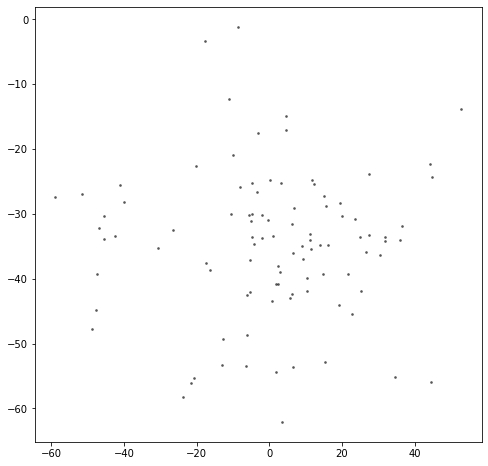

In [28]:
# Show the encoded points in 2D space
figsize = 8

plt.figure(figsize=(figsize, figsize))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c="black", alpha=0.5, s=3)
plt.show()

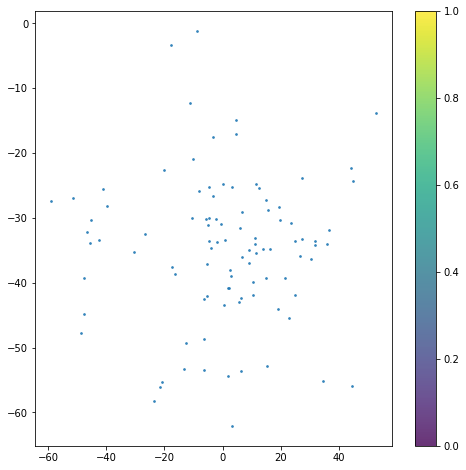

In [29]:
# Colour the embeddings by their label (decorative items type - see table)
example_labels = y_test[:n_to_predict]

figsize = 8
plt.figure(figsize=(figsize, figsize))
plt.scatter(
    embeddings[:, 0],
    embeddings[:, 1],
    cmap="rainbow",
    # c=example_labels,
    alpha=0.8,
    s=3,
)
plt.colorbar()
plt.show()

## 6. Generate using the decoder <a name="decode"></a>

In [30]:
# Get the range of the existing embeddings
mins, maxs = np.min(embeddings, axis=0), np.max(embeddings, axis=0)

# Sample some points in the latent space
grid_width, grid_height = (6, 3)
sample = np.random.uniform(
    mins, maxs, size=(grid_width * grid_height, EMBEDDING_DIM)
)
print('sample.shape: ',sample.shape)

sample.shape:  (18, 2)


In [31]:
# Decode the sampled points
reconstructions = decoder.predict(sample)

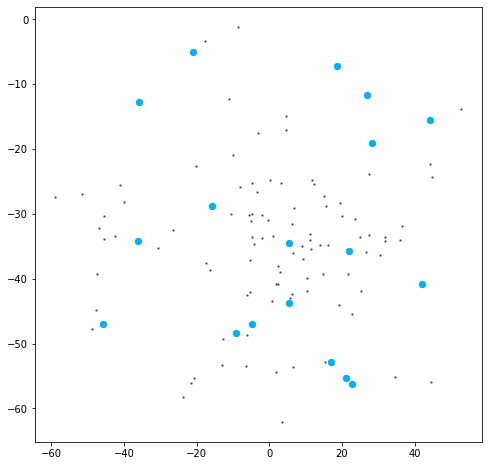

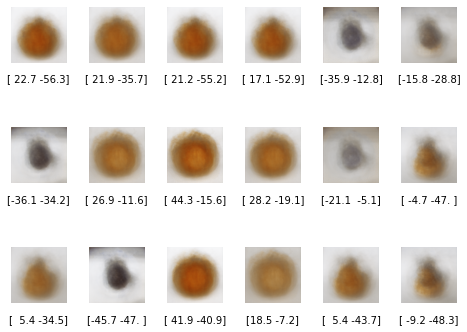

In [32]:
# Draw a plot of...
figsize = 8
plt.figure(figsize=(figsize, figsize))

# ... the original embeddings ...
plt.scatter(embeddings[:, 0], embeddings[:, 1], c="black", alpha=0.5, s=2)

# ... and the newly generated points in the latent space
plt.scatter(sample[:, 0], sample[:, 1], c="#00B0F0", alpha=1, s=40)
plt.show()

# Add underneath a grid of the decoded images
fig = plt.figure(figsize=(figsize, grid_height * 2))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_width * grid_height):
    ax = fig.add_subplot(grid_height, grid_width, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        str(np.round(sample[i, :], 1)),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(reconstructions[i, :, :], cmap="Greys")

In [33]:
def display_image(image, title=None):
    plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
    plt.imshow(image, cmap='gray')  # You can specify the colormap (cmap) if needed

    # Add a title if provided
    if title is not None:
        plt.title(title)

    plt.axis('off')  # Turn off axis labels
    plt.show()

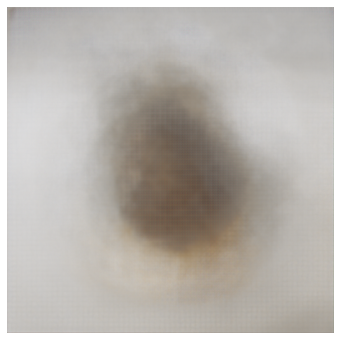

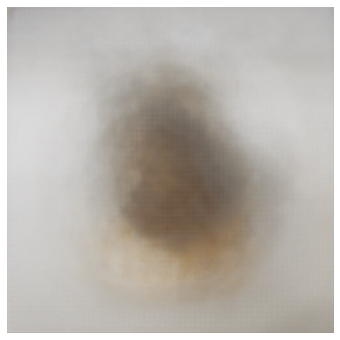

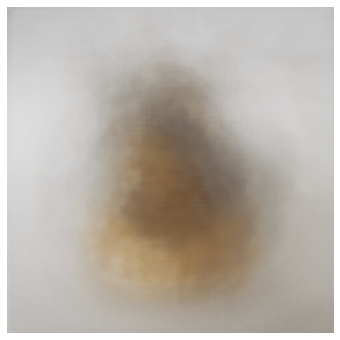

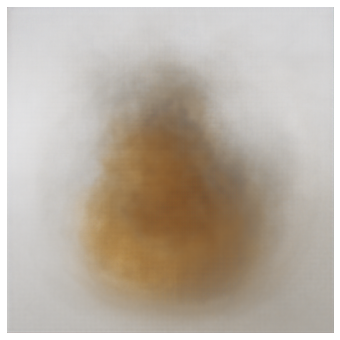

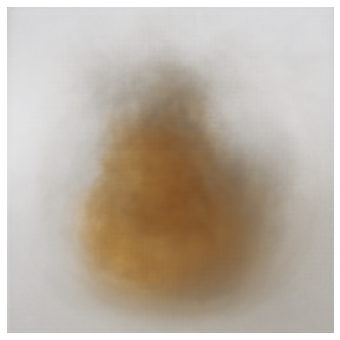

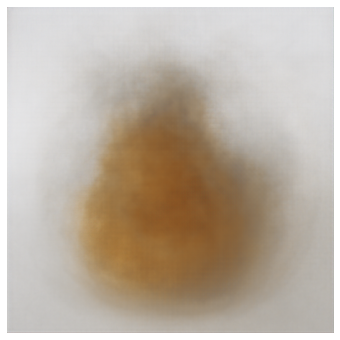

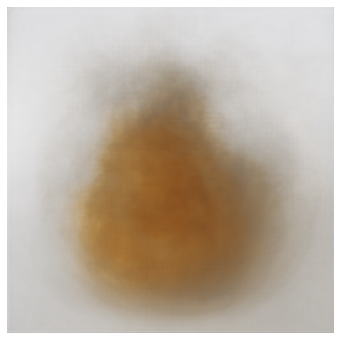

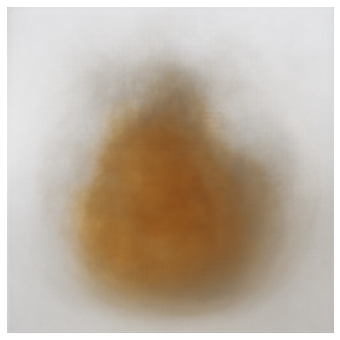

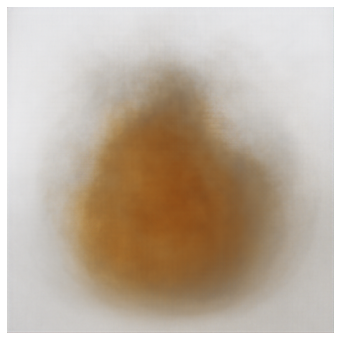

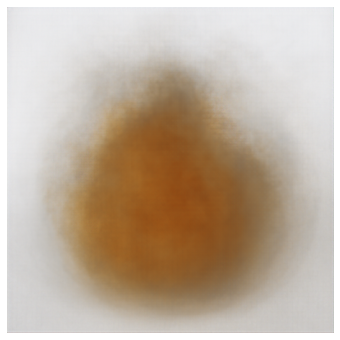

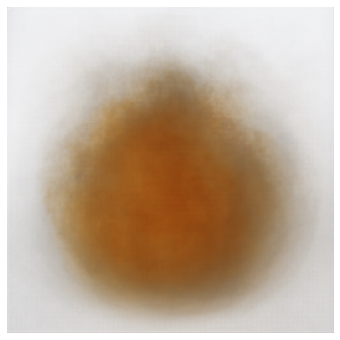

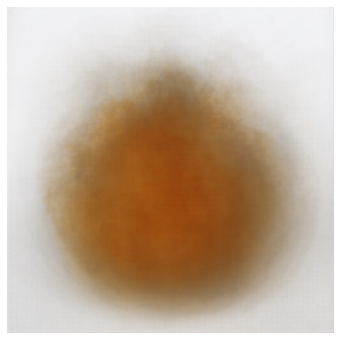

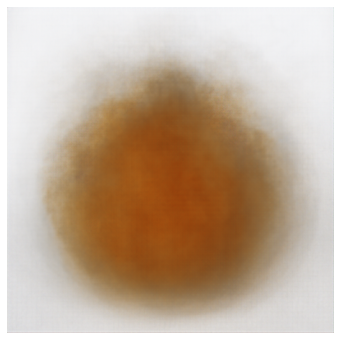

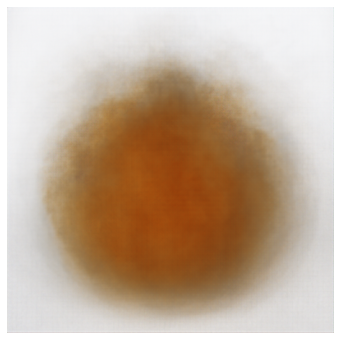

In [34]:
# LATENT SPACE AIRTHMATICS ( morphing)
latent_start = sample[0,:]  # Latent vector for the start image
latent_end = sample[5,:]    # Latent vector for the end image
num_steps = 20

latent_vectors = []
for step in range(num_steps):
    alpha = step / (num_steps - 1)
    latent_interpolated = alpha * latent_start + (1 - alpha) * latent_end
    latent_vectors.append(latent_interpolated)
latent_vectors = np.array(latent_vectors)

# Generate images from interpolated latent vectors
interpolated_images = decoder.predict(latent_vectors)
for img in interpolated_images:
    display_image(img)


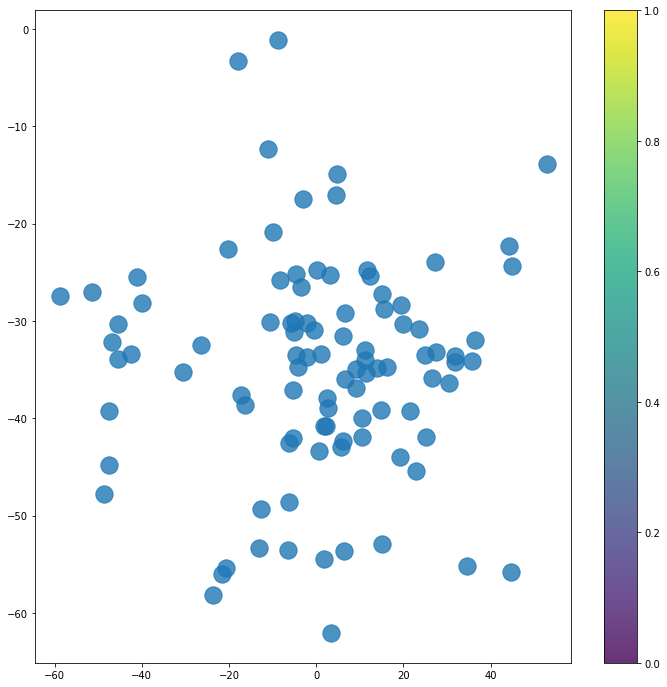

In [35]:
# Colour the embeddings by their label (clothing type - see table)
figsize = 12
grid_size = 15
plt.figure(figsize=(figsize, figsize))
plt.scatter(
    embeddings[:, 0],
    embeddings[:, 1],
    cmap="rainbow",
    # c=example_labels,
    alpha=0.8,
    s=300,
)
plt.colorbar()

x = np.linspace(min(embeddings[:, 0]), max(embeddings[:, 0]), grid_size)
y = np.linspace(max(embeddings[:, 1]), min(embeddings[:, 1]), grid_size)
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
grid = np.array(list(zip(xv, yv)))

reconstructions = decoder.predict(grid)
# plt.scatter(grid[:, 0], grid[:, 1], c="black", alpha=1, s=10)
plt.show()

fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i + 1)
    ax.axis("off")
    ax.imshow(reconstructions[i, :, :], cmap="Greys")